In [1]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import csv
from math import floor
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import namedtuple
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

In [2]:
DATASET_DIR = '/home/italolanza/workspace/TG/dataset/'
DATASET_NAME = 'dataset_completo.csv' 
DATASET_PATH = Path(DATASET_DIR+DATASET_NAME)
MODEL_DIR = '/home/italolanza/workspace/TG/graduation-project/models/'


## Features


In [3]:
collum_name = ['Tacom_1f0', 'Tacom_2f0', 'Tacom_3f0', 'Tacom_kurtosis', 'Tacom_entropy', 'Aceler_Underhang_X_1f0', 'Aceler_Underhang_X_2f0', 'Aceler_Underhang_X_3f0', 'Aceler_Underhang_X_kurtosis', 'Aceler_Underhang_X_entropy', 'Aceler_Underhang_Y_1f0', 'Aceler_Underhang_Y_2f0', 'Aceler_Underhang_Y_3f0', 'Aceler_Underhang_Y_kurtosis', 'Aceler_Underhang_Y_entropy', 'Aceler_Underhang_Z_1f0', 'Aceler_Underhang_Z_2f0', 'Aceler_Underhang_Z_3f0', 'Aceler_Underhang_Z_kurtosis', 'Aceler_Underhang_Z_entropy', 'Aceler_Overhang_X_1f0', 'Aceler_Overhang_X_2f0', 'Aceler_Overhang_X_3f0', 'Aceler_Overhang_X_kurtosis', 'Aceler_Overhang_X_entropy', 'Aceler_Overhang_Y_1f0', 'Aceler_Overhang_Y_2f0', 'Aceler_Overhang_Y_3f0', 'Aceler_Overhang_Y_kurtosis', 'Aceler_Overhang_Y_entropy', 'Aceler_Overhang_Z_1f0', 'Aceler_Overhang_Z_2f0', 'Aceler_Overhang_Z_3f0', 'Aceler_Overhang_Z_kurtosis', 'Aceler_Overhang_Z_entropy', 'Audio_1f0', 'Audio_2f0', 'Audio_3f0', 'Audio_kurtosis', 'Audio_entropy', 'Class']
all_features = ['Tacom_1f0', 'Tacom_2f0', 'Tacom_3f0', 'Tacom_kurtosis', 'Tacom_entropy', 'Aceler_Underhang_X_1f0', 'Aceler_Underhang_X_2f0', 'Aceler_Underhang_X_3f0', 'Aceler_Underhang_X_kurtosis', 'Aceler_Underhang_X_entropy', 'Aceler_Underhang_Y_1f0', 'Aceler_Underhang_Y_2f0', 'Aceler_Underhang_Y_3f0', 'Aceler_Underhang_Y_kurtosis', 'Aceler_Underhang_Y_entropy', 'Aceler_Underhang_Z_1f0', 'Aceler_Underhang_Z_2f0', 'Aceler_Underhang_Z_3f0', 'Aceler_Underhang_Z_kurtosis', 'Aceler_Underhang_Z_entropy', 'Aceler_Overhang_X_1f0', 'Aceler_Overhang_X_2f0', 'Aceler_Overhang_X_3f0', 'Aceler_Overhang_X_kurtosis', 'Aceler_Overhang_X_entropy', 'Aceler_Overhang_Y_1f0', 'Aceler_Overhang_Y_2f0', 'Aceler_Overhang_Y_3f0', 'Aceler_Overhang_Y_kurtosis', 'Aceler_Overhang_Y_entropy', 'Aceler_Overhang_Z_1f0', 'Aceler_Overhang_Z_2f0', 'Aceler_Overhang_Z_3f0', 'Aceler_Overhang_Z_kurtosis', 'Aceler_Overhang_Z_entropy', 'Audio_1f0', 'Audio_2f0', 'Audio_3f0', 'Audio_kurtosis', 'Audio_entropy']

## Loading dataset

In [4]:
dataset = pd.read_csv(DATASET_PATH, names=collum_name)
dataset_x = dataset[all_features].values
dataset_y = dataset['Class'].values.astype(np.uint8)
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.3, shuffle=True)

In [5]:
import onnx
from onnx import numpy_helper

# Convert the Numpy array to a TensorProto
tensor_test_x = numpy_helper.from_array(x_test.astype(np.float32))
tensor_test_y = numpy_helper.from_array(y_test.astype(np.uint8))

# Save dataset as  TensorProto
with open('/home/italolanza/workspace/TG/dataset/x_test.pb', 'wb') as f:
    f.write(tensor_test_x.SerializeToString())

with open('/home/italolanza/workspace/TG/dataset/y_test.pb', 'wb') as f:
    f.write(tensor_test_y.SerializeToString())


# Save dataset as TensorProto
# with open('/home/italolanza/workspace/TG/dataset/x_test_1_tensor.pb', 'wb') as f:
#     f.write(tensor_test_x.SerializeToString())

# with open('/home/italolanza/workspace/TG/dataset/y_test_1_tensor.pb', 'wb') as f:
#     f.write(tensor_test_y.SerializeToString())


# print(x_test)
#np.savetxt('/home/italolanza/workspace/TG/dataset/x_test.csv', x_test, delimiter=',')
#np.savetxt('/home/italolanza/workspace/TG/dataset/y_test.csv', y_test, delimiter=',')
# print((x_test[0:1,:]))
# print((y_test[0:2]))


## Creating the Model

### Defining the Model

In [6]:
def get_model():
    model = Sequential()

    model.add(tf.keras.layers.Dense(32, input_dim=40, activation="relu"))
    model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))

    return model

### Compiling the Model

In [7]:
model = get_model()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics='accuracy')

2022-04-12 17:57:50.798978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:57:50.805090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:57:50.805546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:57:50.806138: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1312      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________


### Training the Model

Epoch 1/500
43/43 [==============================] - 1s 2ms/step - loss: 12270.6230 - accuracy: 0.2293
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 3231.8464 - accuracy: 0.3846
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 2025.7825 - accuracy: 0.4850
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 1579.1439 - accuracy: 0.5121
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 1239.5424 - accuracy: 0.5473
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 1006.7355 - accuracy: 0.5648
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 848.0258 - accuracy: 0.5868
Epoch 8/500
43/43 [==============================] - 0s 2ms/step - loss: 682.6150 - accuracy: 0.6073
Epoch 9/500
43/43 [==============================] - 0s 2ms/step - loss: 579.0472 - accuracy: 0.6278
Epoch 10/500
43/43 [==============================] - 0s 2ms/step - loss: 528.1846 -

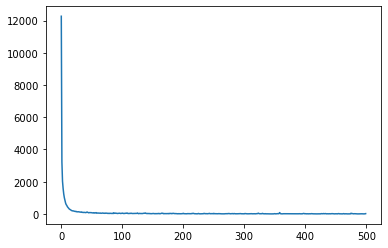

In [9]:
hist = model.fit(x_train,y_train,epochs=500)

plt.plot(hist.history['loss'])

In [10]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)


Evaluate on test data
5/5 [==============================] - 0s 2ms/step - loss: 97.0306 - accuracy: 0.9044
test loss, test acc: [97.0306396484375, 0.9044368863105774]
Generate predictions for 3 samples
predictions shape: (3, 6)


## Saving the Model

In [11]:
# tf.saved_model.save(model, MODEL_DIR+'tf_model')
model.save(MODEL_DIR+'tf_model')

2022-04-12 17:58:34.336436: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/italolanza/workspace/TG/graduation-project/models/tf_model/assets


## Converting Model to ONNX

In [12]:
import tf2onnx
import onnxruntime as rt

output_path = MODEL_DIR + model.name + ".onnx"
# output_path = MODEL_DIR + model.name + 'fixed_input_spec' + ".onnx"


spec = (tf.TensorSpec(tf.TensorShape([None, 40]), tf.float32, name="input"),)
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)

output_names = [n.name for n in model_proto.graph.output]


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


2022-04-12 17:58:34.842056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:58:34.842280: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-04-12 17:58:34.842396: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-04-12 17:58:34.842652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:58:34.842864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 17:58:34.843058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] su

In [13]:
print(output_names)


['dense_1']


## Running the ONNX Model

In [14]:

providers = ['CPUExecutionProvider']
sess_options = rt.SessionOptions()
sess_options.enable_profiling = True

m = rt.InferenceSession(output_path, providers=providers, sess_options=sess_options)
onnx_pred = m.run(output_names, {"input": np.float32(x_test[:3])})

print('ONNX Predicted:', onnx_pred[0])

# make sure ONNX and keras have the same results
np.testing.assert_allclose(predictions, onnx_pred[0], rtol=1e-5)
print('Model Predicted:', predictions)

ONNX Predicted: [[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
Model Predicted: [[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
